In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Membaca dataset penjualan
df = pd.read_csv("sales.csv")

# Menampilkan 5 data pertama
df.head()

,order_id,date,store,product,quantity,sales
0,1,01/01/2023,Lower Manhattan,Gourmet brewed coffee,2,6.0
1,2,01/01/2023,Lower Manhattan,Brewed Chai tea,2,6.2
2,3,01/01/2023,Lower Manhattan,Hot chocolate,2,9.0
3,4,01/01/2023,Lower Manhattan,Drip coffee,1,2.0
4,5,01/01/2023,Lower Manhattan,Brewed Chai tea,2,6.2


## Load Dataset
Dataset penjualan dimuat ke dalam dataframe.

In [33]:
df.sample(5)

,order_id,date,store,product,quantity,sales
19675,19705,05/02/2023,Hell's Kitchen,Hot chocolate,2,9.00
133329,133666,17/06/2023,Lower Manhattan,Scone,1,3.00
24394,24451,13/02/2023,Astoria,Brewed herbal tea,2,5.00
130380,130717,15/06/2023,Astoria,Brewed herbal tea,1,2.50
59679,59849,07/04/2023,Lower Manhattan,Scone,1,3.25


In [34]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   order_id  149116 non-null  int64  
 1   date      149116 non-null  object 
 2   store     149116 non-null  object 
 3   product   149116 non-null  object 
 4   quantity  149116 non-null  int64  
 5   sales     149116 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 6.8+ MB


,order_id,quantity,sales
count,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,4.686367
std,43153.600016,0.542509,4.227099
min,1.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000
50%,74727.500000,1.000000,3.750000
75%,112094.250000,2.000000,6.000000
max,149456.000000,8.000000,360.000000


## Memahami Struktur Data
Melihat tipe data, jumlah data, dan kondisi dataset.

In [35]:
# Mengubah kolom date menjadi datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Membuat kolom bulan
df['month'] = df['date'].dt.month

df.head()

,order_id,date,store,product,quantity,sales,month
0,1,2023-01-01,Lower Manhattan,Gourmet brewed coffee,2,6.0,1
1,2,2023-01-01,Lower Manhattan,Brewed Chai tea,2,6.2,1
2,3,2023-01-01,Lower Manhattan,Hot chocolate,2,9.0,1
3,4,2023-01-01,Lower Manhattan,Drip coffee,1,2.0,1
4,5,2023-01-01,Lower Manhattan,Brewed Chai tea,2,6.2,1


## Data Wrangling
Pada tahap ini dilakukan:
- Mengubah kolom date menjadi format datetime
- Membuat kolom month
- Membuat kolom revenue

## Pertanyaan Analisis

1. Hari apa yang mengalami perubahan penjualan paling ekstrem dibanding hari sebelumnya?
2. Store mana yang memiliki performa paling stabil?
3. Apakah terdapat transaksi dengan jumlah pembelian yang tidak wajar?
4. Store mana yang paling efisien menghasilkan revenue?
5. Kapan terjadi "sales shock" dalam dataset?
6. Produk apa yang memiliki permintaan tidak konsisten?
7. Apakah ada pola peningkatan atau penurunan penjualan seiring waktu?

## Tugas 1 Analisis Perubahan Penjualan Paling Ekstrem

Analisis ini bertujuan mencari hari dimana terjadi perubahan penjualan
yang paling besar dibandingkan hari sebelumnya.
Perubahan ini bisa berupa kenaikan drastis atau penurunan tajam.

In [54]:
# menghitung total sales per hari
daily_sales = df.groupby('date')['sales'].sum().reset_index()

# mengurutkan berdasarkan tanggal
daily_sales = daily_sales.sort_values(by='date')

# menghitung perubahan sales dari hari sebelumnya
daily_sales['change'] = daily_sales['sales'].diff()

# mencari perubahan paling ekstrem (nilai absolut terbesar)
extreme_change = daily_sales.loc[daily_sales['change'].abs().idxmax()]

extreme_change

date      2023-06-08 00:00:00
sales                 6151.59
change                1268.49
Name: 158, dtype: object

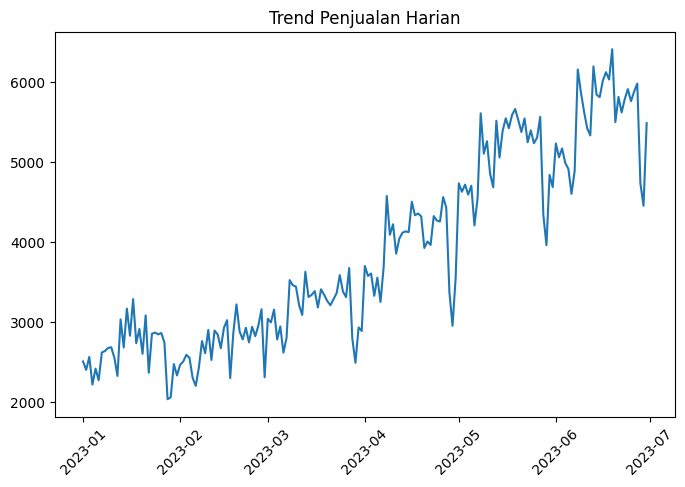

In [69]:
plt.figure(figsize=(8,5))
plt.plot(daily_sales['date'], daily_sales['sales'])
plt.title("Trend Penjualan Harian")
plt.xticks(rotation=45)
plt.show()

Dari hasil analisis terlihat bahwa terdapat hari dimana perubahan penjualan dari hari sebelumnya sangat besar. 
Perubahan ini menunjukkan bahwa pada hari tersebut terjadi perbedaan aktivitas pembelian yang cukup signifikan dibandingkan hari sebelumnya.
Hal ini bisa terjadi karena jumlah pengunjung yang meningkat atau adanya faktor tertentu yang mempengaruhi penjualan pada hari itu.

## Tugas 2 Analisis Stabilitas Store

Analisis ini bertujuan melihat store mana yang penjualannya paling stabil.
Semakin kecil standar deviasi sales, berarti performanya lebih stabil.

In [70]:
# menghitung variasi sales tiap store
store_variability = df.groupby('store')['sales'].std().reset_index()

# mengurutkan dari yang paling stabil
store_variability = store_variability.sort_values(by='sales')

store_variability

,store,sales
0,Astoria,2.877599
2,Lower Manhattan,3.280648
1,Hell's Kitchen,5.839339


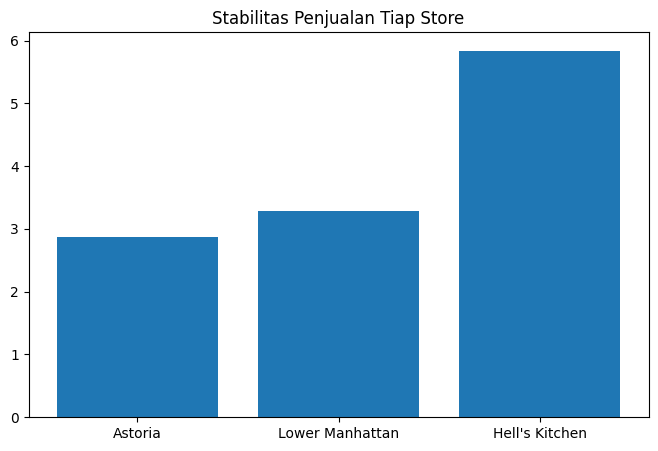

In [71]:
plt.figure(figsize=(8,5))
plt.bar(store_variability['store'], store_variability['sales'])
plt.title("Stabilitas Penjualan Tiap Store")
plt.show()

Berdasarkan hasil perhitungan standar deviasi penjualan, dapat dilihat store mana yang memiliki penjualan paling stabil. 
Store dengan nilai variasi paling kecil berarti penjualannya cenderung konsisten dari waktu ke waktu dibandingkan store lainnya.

# Tugas 3 Deteksi Outlier Transaksi

Pada bagian ini saya mencoba mendeteksi transaksi yang jumlah pembeliannya tidak biasa menggunakan metode IQR.

In [38]:
# mencari Q1 dan Q3
Q1 = df['quantity'].quantile(0.25)
Q3 = df['quantity'].quantile(0.75)

# menghitung IQR
IQR = Q3 - Q1

# menentukan batas bawah dan atas
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# mengambil data yang termasuk outlier
outliers = df[(df['quantity'] < lower) | (df['quantity'] > upper)]

outliers

,order_id,date,store,product,quantity,sales,month
4163,4193,2023-01-08,Lower Manhattan,Sugar free syrup,4,3.2,1
4352,4382,2023-01-08,Lower Manhattan,Regular syrup,4,3.2,1
9310,9340,2023-01-17,Hell's Kitchen,Premium Beans,8,360.0,1
9365,9395,2023-01-17,Hell's Kitchen,Premium Beans,8,360.0,1
16490,16520,2023-01-30,Lower Manhattan,Housewares,4,56.0,1
21416,21473,2023-02-08,Lower Manhattan,Sugar free syrup,4,3.2,2
21532,21589,2023-02-08,Lower Manhattan,Sugar free syrup,4,3.2,2
38494,38601,2023-03-08,Lower Manhattan,Sugar free syrup,4,3.2,3
38550,38657,2023-03-08,Lower Manhattan,Sugar free syrup,4,3.2,3
38707,38814,2023-03-08,Lower Manhattan,Regular syrup,4,3.2,3


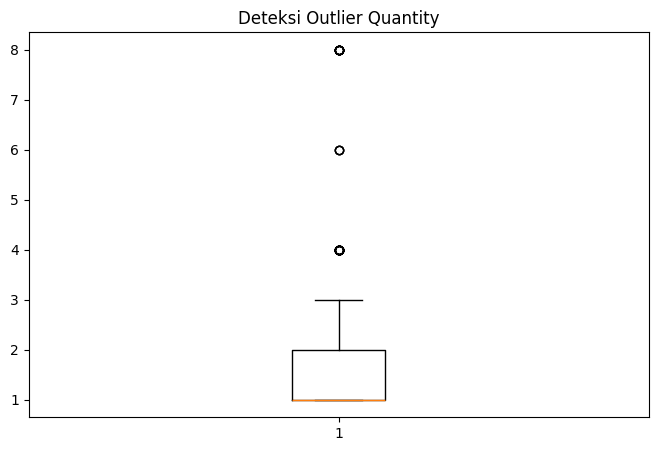

In [57]:
plt.figure(figsize=(8,5))
plt.boxplot(df['quantity'])
plt.title("Deteksi Outlier Quantity")
plt.show()

Hasil analisis menunjukkan bahwa terdapat beberapa transaksi yang memiliki jumlah pembelian di luar batas normal. 
Data tersebut disebut outlier karena nilainya jauh berbeda dibandingkan sebagian besar transaksi lainnya.
Hal ini bisa terjadi karena pembelian dalam jumlah besar atau kemungkinan kesalahan input data.

## Tugas 4 Efisiensi Store

Efisiensi dihitung dari total sales dibagi jumlah transaksi.
Tujuannya untuk melihat store yang menghasilkan pendapatan besar walaupun jumlah transaksi tidak terlalu banyak.

In [61]:
# total sales tiap store
store_sales = df.groupby('store')['sales'].sum()

# jumlah transaksi tiap store
store_transactions = df.groupby('store')['order_id'].count()

# menghitung efisiensi
efficiency = (store_sales / store_transactions).reset_index()

efficiency.columns = ['store', 'efficiency_score']

# mengurutkan dari paling efisien
efficiency.sort_values(by='efficiency_score', ascending=False).reset_index(drop=True)

,store,efficiency_score
0,Lower Manhattan,4.814726
1,Hell's Kitchen,4.661696
2,Astoria,4.589891


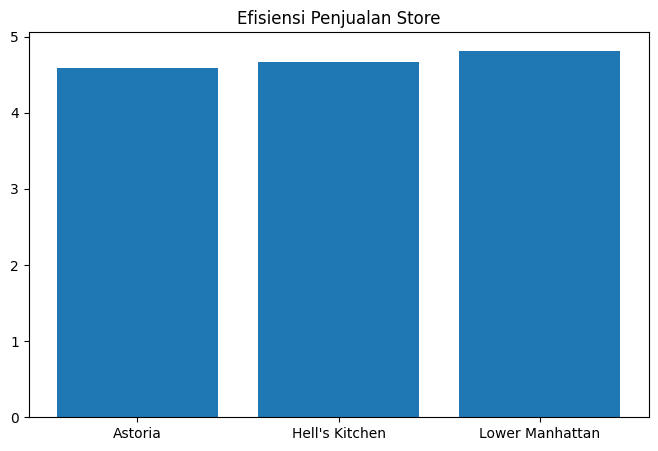

In [58]:
plt.figure(figsize=(8,5))
plt.bar(efficiency['store'], efficiency['efficiency_score'])
plt.title("Efisiensi Penjualan Store")
plt.show()

Dari hasil perhitungan efisiensi, terlihat store mana yang mampu menghasilkan penjualan rata-rata lebih tinggi dalam setiap transaksi. 
Store dengan efficiency score tertinggi dapat dianggap lebih efektif dalam menghasilkan penjualan dibandingkan store lainnya.

# Tugas 5 Sales Shock Detection
Analisis ini bertujuan mendeteksi hari dimana penjualan tiba-tiba melonjak dibandingkan hari lainnya.

In [76]:
# menghitung total sales per hari dan per store
daily_store_sales = df.groupby(['date', 'store'])['sales'].sum().reset_index()

# menghitung rata-rata dan standar deviasi
mean_sales = daily_store_sales['sales'].mean()
std_sales = daily_store_sales['sales'].std()

# menentukan batas sales shock
threshold = mean_sales + 2 * std_sales

# mengambil data yang melewati batas
sales_shock_store = daily_store_sales[daily_store_sales['sales'] > threshold]

sales_shock_store
df.head()

,order_id,date,store,product,quantity,sales,month
0,1,2023-01-01,Lower Manhattan,Gourmet brewed coffee,2,6.0,1
1,2,2023-01-01,Lower Manhattan,Brewed Chai tea,2,6.2,1
2,3,2023-01-01,Lower Manhattan,Hot chocolate,2,9.0,1
3,4,2023-01-01,Lower Manhattan,Drip coffee,1,2.0,1
4,5,2023-01-01,Lower Manhattan,Brewed Chai tea,2,6.2,1


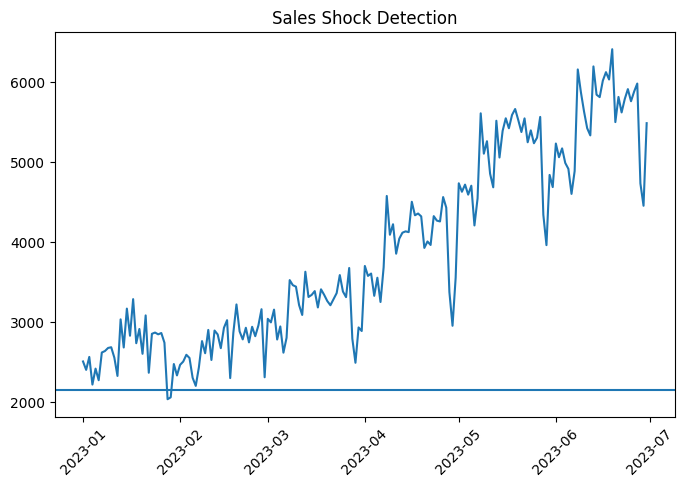

In [77]:
plt.figure(figsize=(8,5))
plt.plot(daily_sales['date'], daily_sales['sales'])

plt.axhline(threshold)

plt.title("Sales Shock Detection")
plt.xticks(rotation=45)
plt.show()

Hasil analisis menunjukkan bahwa hanya terdapat satu hari dengan lonjakan penjualan yang sangat tinggi dibandingkan hari lainnya, yaitu pada tanggal 19 Juni 2023.

Berdasarkan hasil analisis, terlihat bahwa setiap store memiliki tingkat kestabilan penjualan yang berbeda. 
Store dengan nilai variasi penjualan paling kecil menunjukkan bahwa penjualannya lebih konsisten dari waktu ke waktu.
Sedangkan store dengan variasi lebih besar berarti penjualannya lebih berubah-ubah.

# Tugas 6 Analisis Permintaan Produk

Saya ingin melihat produk mana yang permintaannya paling tidak stabil.

In [41]:
product_variability = df.groupby('product')['quantity'].std().reset_index()

product_variability = product_variability.sort_values(by='quantity', ascending=False)

product_variability.head(10)

,product,quantity
24,Premium Beans,1.191283
28,Sugar free syrup,0.569545
6,Brewed herbal tea,0.558750
5,Brewed Green tea,0.558303
0,Barista Espresso,0.556730
3,Brewed Black tea,0.556657
13,Gourmet brewed coffee,0.553151
22,Organic brewed coffee,0.547584
4,Brewed Chai tea,0.546126
10,Drip coffee,0.546085


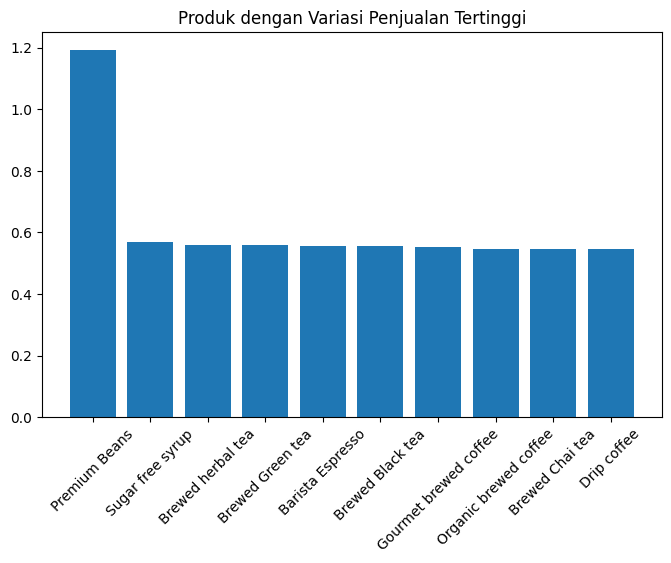

In [68]:
top_products = product_variability.head(10)

plt.figure(figsize=(8,5))
plt.bar(top_products['product'], top_products['quantity'])
plt.title("Produk dengan Variasi Penjualan Tertinggi")
plt.xticks(rotation=45)
plt.show()

Berdasarkan analisis variasi quantity, terlihat bahwa beberapa produk memiliki permintaan yang tidak stabil. 
Artinya jumlah pembelian produk tersebut sering berubah-ubah dalam periode waktu yang berbeda.

# Tugas 7 Tren Penjualan

Analisis ini bertujuan melihat pola penjualan sepanjang waktu.

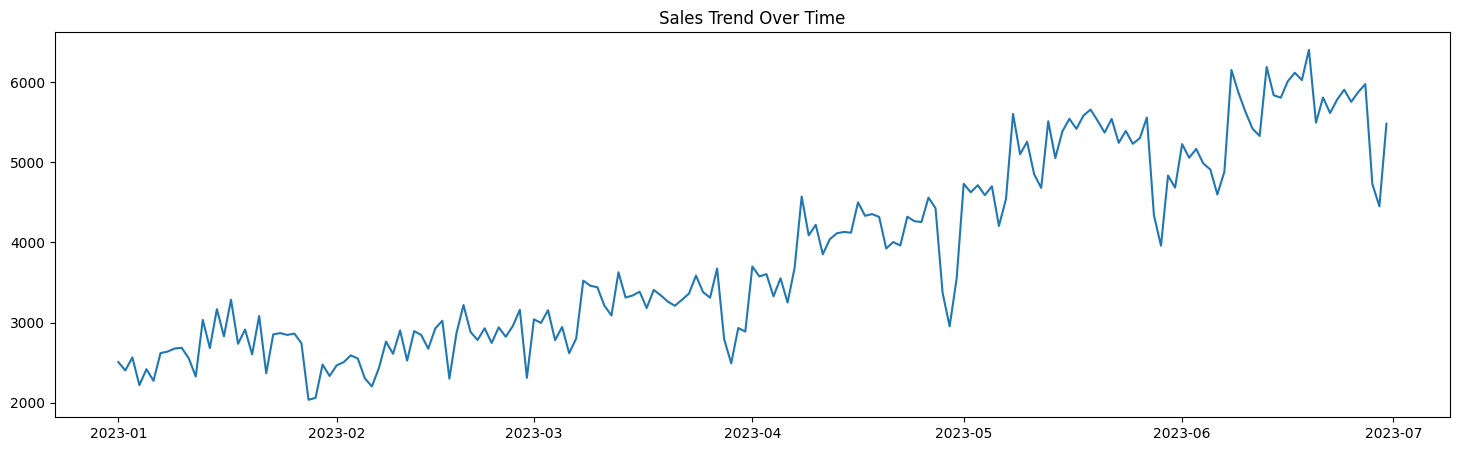

In [73]:
plt.figure(figsize=(18,5))

# membuat grafik tren sales
plt.plot(daily_sales['date'], daily_sales['sales'])

plt.title("Sales Trend Over Time")

plt.show()

Dari grafik tren penjualan terlihat bagaimana pola penjualan berubah seiring waktu. 
Grafik ini membantu melihat apakah penjualan cenderung meningkat, menurun, atau relatif stabil selama periode dataset.

## Kesimpulan

Berdasarkan analisis yang telah dilakukan pada dataset penjualan, dapat disimpulkan bahwa terdapat beberapa pola menarik dalam data.

Beberapa hari menunjukkan perubahan penjualan yang cukup signifikan dibandingkan hari lainnya. Selain itu, setiap store memiliki tingkat kestabilan dan efisiensi penjualan yang berbeda.

Analisis juga menunjukkan adanya transaksi yang tergolong tidak biasa atau outlier dalam jumlah pembelian. Selain itu, beberapa produk memiliki permintaan yang tidak konsisten dari waktu ke waktu.

Dari grafik tren penjualan juga dapat dilihat bagaimana penjualan berubah sepanjang periode data yang dianalisis.

Secara keseluruhan, analisis ini membantu memahami pola penjualan, perilaku pembelian pelanggan, serta perbedaan performa antar store dalam dataset.